In [1]:
import os

# Change to the parent directory
os.chdir('../..')

# Verify the path using getcwd()
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: c:\Users\onyer\OneDrive\Desktop\Research work\1. Projects\Battery_Analysis1


In [2]:
import pandas as pd
import math
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import scipy as sp
import src.file_loader as fl
import src.sysid_util as sid
import src.data_processing as dp
import src.plotting as plot
import scipy.signal as signal
from scipy.signal import TransferFunction

Columns: Index(['flags', 'Ns', 'time/s', 'control/mA', 'Ewe/V', 'I/mA', 'dQ/C',
       '(Q-Qo)/C', 'half cycle', 'Q charge/discharge/mA.h', 'I Range'],
      dtype='object')
Data: 0     0.000000
1    10.000000
2    19.999999
3    29.999999
4    39.999999
Name: time/s, dtype: float64
Columns: Index(['control/mA', 'Ewe/V'], dtype='object')
Data:            control/mA     Ewe/V
time/s                         
0.000000         0.01  0.407403
10.000000        0.01  0.729420
19.999999        0.01  0.746633
29.999999        0.01  0.757071
39.999999        0.01  0.764113


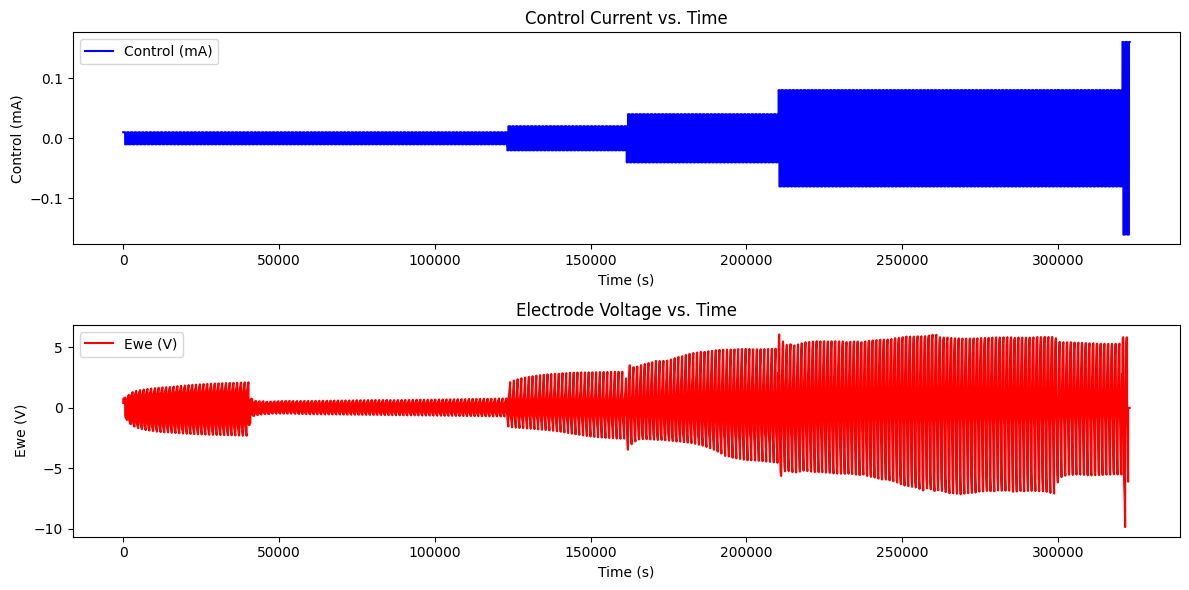

In [3]:
# Load data
mpr_file4 = fl.load_mpr("12to1-25%CNC-3%GQDs _C01.mpr")
df4 = pd.DataFrame(mpr_file4.data)

# Get columns
print("Columns:", df4.columns)
print("Data:", df4['time/s'].head())


# df4['time'] = df4.index
df4 = df4.set_index('time/s')[['control/mA', 'Ewe/V']]

print("Columns:", df4.columns)
print("Data:", df4.head())

# Plotting
plt.figure(figsize=(12, 6))

# Plot 'control/mA'
plt.subplot(2, 1, 1)
plt.plot(df4.index, df4['control/mA'], color='blue', label='Control (mA)')
plt.xlabel('Time (s)')
plt.ylabel('Control (mA)')
plt.title('Control Current vs. Time')
plt.legend()

# Plot 'Ewe/V'
plt.subplot(2, 1, 2)
plt.plot(df4.index, df4['Ewe/V'], color='red', label='Ewe (V)')
plt.xlabel('Time (s)')
plt.ylabel('Ewe (V)')
plt.title('Electrode Voltage vs. Time')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [4]:
charging_cycles = dp.find_charging_cycles(df4)

In [ ]:
# Save all charging cycles to CSV files
for idx, cycle_df in enumerate(charging_cycles):
    cycle_df.to_csv(f'charging_cycle_{idx}.csv', index=False)

In [5]:
# Example: Access charging cycle number 38
cycle_38 = charging_cycles[38]

# Do something with it, e.g., print or save
print(cycle_38)

# # Optional: Save it
# cycle_38.to_csv('charging_cycle_38.csv', index=False)


              control/mA     Ewe/V
45510.029573       -0.01 -0.497274
45520.029573       -0.01 -0.498705
45530.029573       -0.01 -0.500098
45540.029573       -0.01 -0.502102
45550.029573       -0.01 -0.503457
...                  ...       ...
46160.029974        0.01  0.500809
46170.029974        0.01  0.502508
46180.029974        0.01  0.504130
46190.029974        0.01  0.505771
46200.029974        0.01  0.507393

[71 rows x 2 columns]


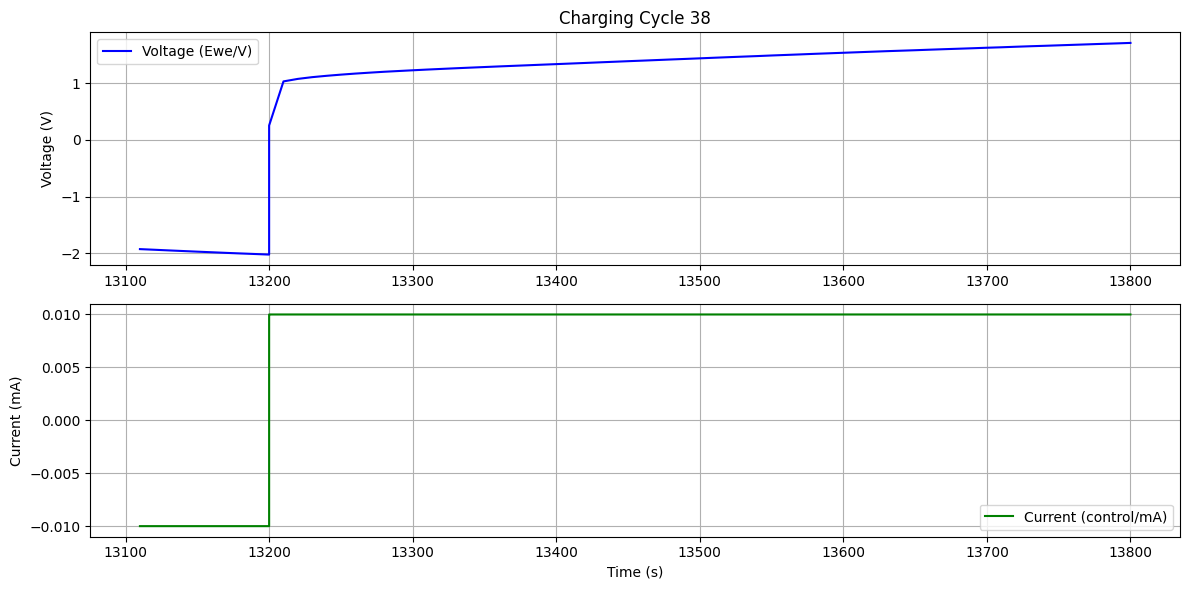

In [12]:
# Access charging cycle number 38
cycle_38 = charging_cycles[11]

# Plot voltage and current over time
plt.figure(figsize=(12, 6))

# Plot voltage
plt.subplot(2, 1, 1)
plt.plot(cycle_38.index, cycle_38['Ewe/V'], label='Voltage (Ewe/V)', color='blue')
plt.ylabel('Voltage (V)')
plt.title('Charging Cycle 38')
plt.grid(True)
plt.legend()

# Plot current
plt.subplot(2, 1, 2)
plt.plot(cycle_38.index, cycle_38['control/mA'], label='Current (control/mA)', color='green')
plt.ylabel('Current (mA)')
plt.xlabel('Time (s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
# Specify the cycle indices you want to save
selected_indices = [11, 38, 123, 200]

# Save only the selected cycles to different sheets
with pd.ExcelWriter("charging_cycles_selected.xlsx") as writer:
    for idx in selected_indices:
        if idx < len(charging_cycles):
            charging_cycles[idx].to_excel(writer, sheet_name=f"cycle_{idx}", index=False)
        else:
            print(f"Cycle {idx} is out of range.")
